# **Plot New Reward Model**

In [9]:
import os
import json
import pandas as pd
import numpy as np
import gymnasium as gym
from datetime import datetime

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecMonitor

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# User defined imports
import tools_RLHF


Data loaded successfully


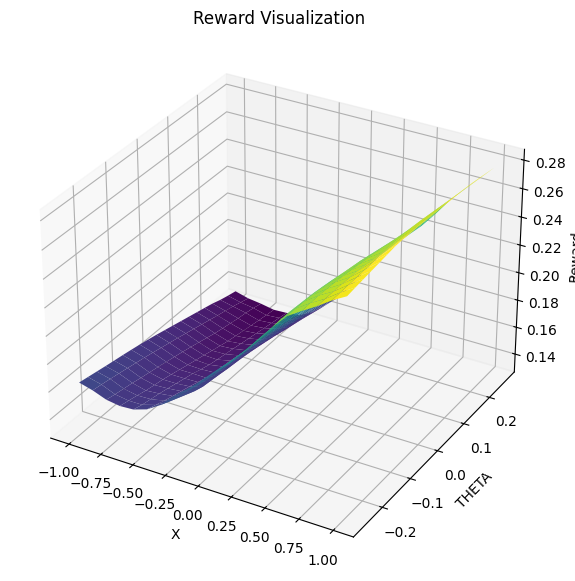

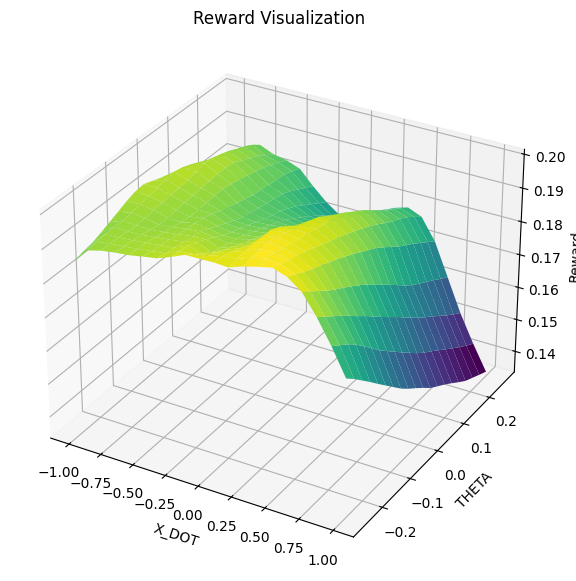

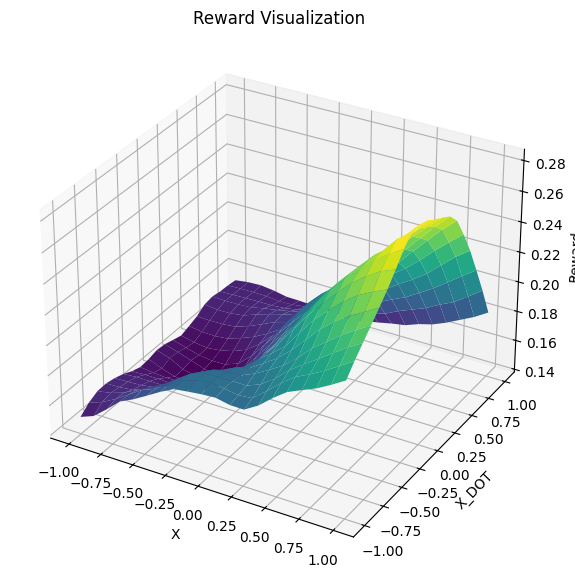

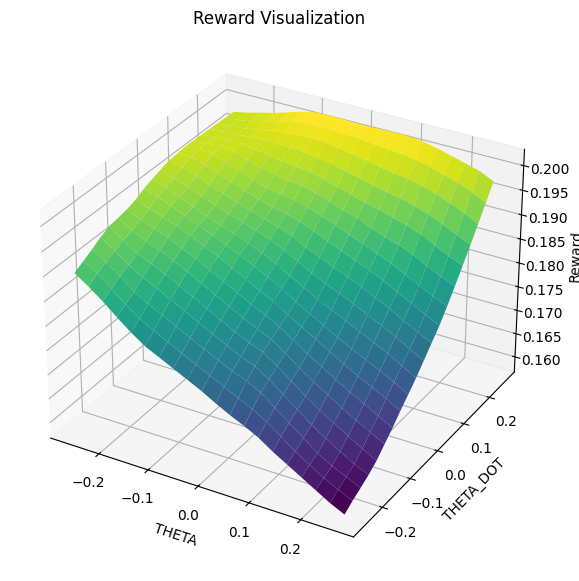

In [10]:


Label_list = [
    'X',
    'X_DOT',
    'THETA',
    'THETA_DOT'
]

def visualize_reward(reward_net, state1_range, state1_index, state2_range, state2_index):
    """
    Visualize the reward function for given state ranges and indices.

    Parameters:
    - reward_net: The reward network to evaluate.
    - state1_range: The range of values for the first state dimension.
    - state1_index: The index of the first state dimension.
    - state2_range: The range of values for the second state dimension.
    - state2_index: The index of the second state dimension.
    """
    # Create data points
    state_1_grid, state_2_grid = torch.meshgrid(state1_range, state2_range, indexing='ij')
    reward_values = torch.zeros_like(state_1_grid)

    # Compute reward
    for i in range(state_1_grid.shape[0]):
        for j in range(state_1_grid.shape[1]):
            # Construct state and action
            state = torch.zeros(Data.dim_state)
            state[state1_index] = state_1_grid[i, j]
            state[state2_index] = state_2_grid[i, j]
            action = torch.zeros(Data.dim_action)

            # Compute reward
            with torch.no_grad():
                reward_values[i, j] = reward_net(state.view(1, -1), action.view(1, -1))

    # Plot 3D graph
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(state_1_grid.numpy(), state_2_grid.numpy(), reward_values.numpy(), cmap='viridis')
    x_label = Label_list[state1_index]
    y_label = Label_list[state2_index]
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel('Reward')
    ax.set_title('Reward Visualization')
    plt.show()


X         = 0
X_DOT     = 1
THETA     = 2
THETA_DOT = 3
GRID_SIZE = 20

# ———— Load Data ————
path = "trajectory_pairs.csv"
Data = tools_RLHF.Data_Class(path)

# ——— Load MLP Reward Model ———
reward_net_loaded = tools_RLHF.RewardMLP(Data.dim_state, Data.dim_action, hidden_dim=64)
reward_net_loaded.load_state_dict(torch.load('reward_net.pth', weights_only=True))
reward_net_loaded.eval()

visualize_reward(reward_net_loaded,
                  state1_range=torch.linspace(-1, 1, GRID_SIZE),
                  state1_index=X,
                  state2_range=torch.linspace(-np.deg2rad(15), +np.deg2rad(15), GRID_SIZE),
                  state2_index=THETA)

visualize_reward(reward_net_loaded,
                  state1_range=torch.linspace(-1, 1, GRID_SIZE),
                  state1_index=X_DOT,
                  state2_range=torch.linspace(-np.deg2rad(15), +np.deg2rad(15), GRID_SIZE),
                  state2_index=THETA)

visualize_reward(reward_net_loaded,
                  state1_range=torch.linspace(-1, 1, GRID_SIZE),
                  state1_index=X,
                  state2_range=torch.linspace(-1, 1, GRID_SIZE),
                  state2_index=X_DOT)

visualize_reward(reward_net_loaded,
                  state1_range=torch.linspace(-np.deg2rad(15), +np.deg2rad(15), GRID_SIZE),
                  state1_index=THETA,
                  state2_range=torch.linspace(-np.deg2rad(15), +np.deg2rad(15), GRID_SIZE),
                  state2_index=THETA_DOT)